### Multiple Linear Regression

### 1.1 Data set

자동차의 여러 기술적인 사양들을 고려하여 연비 (auto miles per gallon(MPG))를 예측하기

In [2]:
import pandas
import seaborn # 데이터 시각화 패키지
seaborn.set()

In [1]:
from urllib.request import urlretrieve
URL = 'https://go.gwu.edu/engcomp6data3'
urlretrieve(URL, 'auto_mpg.csv')


# auto miles per gallon(MPG) dataset

('auto_mpg.csv', <http.client.HTTPMessage at 0x7fe3501b6820>)

In [5]:
mpg_data = pandas.read_csv('auto_mpg.csv') # pandas로 csv 파일 읽어오기
mpg_data.head() # head는 str이런 자료형엔 못쓰고 DataFrame일 때 쓸 수 있음

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [7]:
type(mpg_data)
# DataFrame은 시리즈 여러개가 합쳐진 자료형
# 즉 열 하나만 가져오면 그건 series가 됨

pandas.core.frame.DataFrame

In [6]:
mpg_data.info() # 이것도 str안되고 DataFrame에만 쓰일 수 있음

# m =  391

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 27.7+ KB


392개의 데이터 9개의 feature variables  
car name, origin (차가 만들어진 도시 categorical함) 이거 두개는 제외하고 생각

In [8]:
# mpg_data의 컬럼들을 용도에 따라 y_col, x_cols라고 이름 붙여주기...?
y_col = 'mpg'
x_cols = mpg_data.columns.drop(['car name', 'origin', 'mpg']) #df.drop['B'C]

In [9]:
x_cols

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model year'],
      dtype='object')

In [19]:
type(y_col)

str

In [20]:
y_col
# mpg_data(DF)의 컬럼'이름을(인덱스)'을 y_col라는 변수에 할당해준 듯

'mpg'

### 1.2 Data exploration

각 $x$ (자동차의 속성)들과 연비와의 상관관계를 개별적으로 알아보기  
그래프 모양을 보고 linear model을 써도 되는지 알아볼 수 있다 $->$ 시각화 해서 보는것이 직관적   
여기에서 데이터 시각화 패키지 $seaborn$이 쓰인다

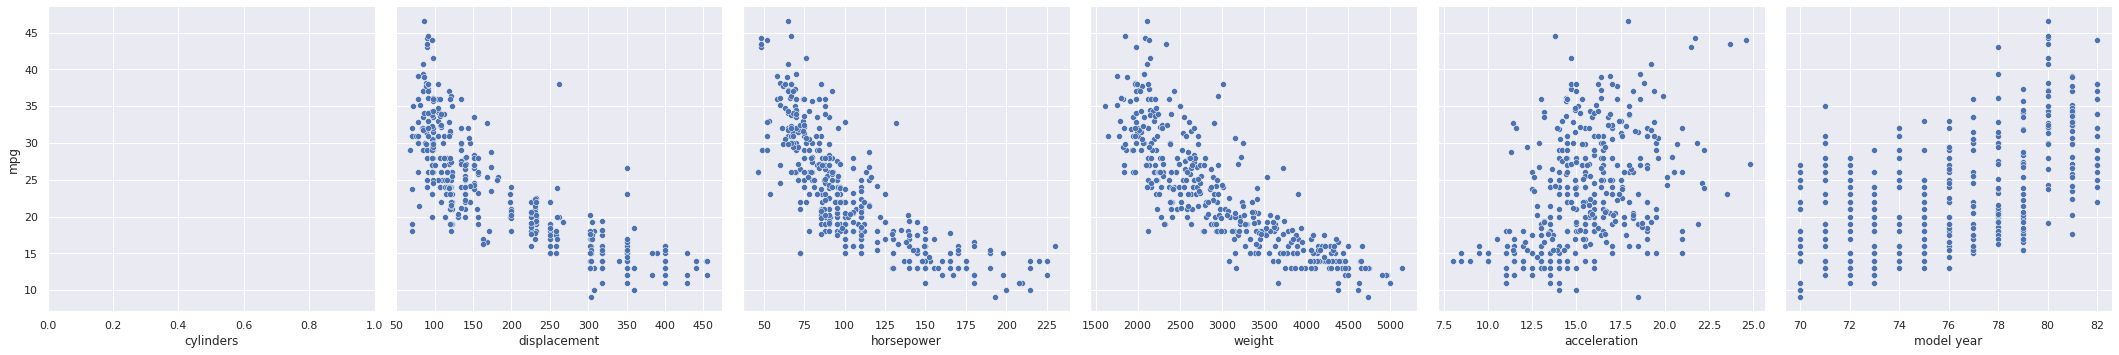

In [55]:
seaborn.pairplot(data=mpg_data, height=5, aspect=1, x_vars=x_cols, y_vars=y_col)
# 왜 cylinders 데이터 사라졌냐

$acceleration$이랑 $model$ $year$는 mpg와 음의 상관관계  

### 1.3 Linear model in matrix form

Multiple linear regression 에서 입력 변수가 $d$개라고 하면 모델은 다음과 같음. $\hat{y}$는 예측 값. 

$$\hat{y} = w_0 + w_1x_1 + w_2x_2 + ... + w_dx_d$$
편의를 위해 $x_0=1$ 를 추가해서 위 식을 두 벡터의 내적. 즉, 행렬 형태로 나타낼 수 있음

$$\hat{y} = \sum_{i=0}^d w_ix_i = \mathbf{x}^\top \mathbf{w}$$
$\mathbf{x} = (x_0, x_1, ... , x_d)$는 입력 변수들로 이루어진 벡터  
$\mathbf{w} = (w_0, w_1, ... , w_d)$는 계수들로 이루어진 벡터



이제 우리는 392개의 데이터를 가지고 있습니다. 이를 $N$개라고 생각하고 식을 나열하기
$$\hat{y}^{(1)} = w_0x_0^{(1)} + w_1x_1^{(1)} + w_2x_2^{(1)} + ... + w_dx_d^{(1)}$$
$$\hat{y}^{(2)} = w_0x_0^{(2)} + w_1x_1^{(2)} + w_2x_2^{(2)} + ... + w_dx_d^{(2)}$$
$$\vdots$$
$$\hat{y}^{(N)} = w_0x_0^{(N)} + w_1x_1^{(N)} + w_2x_2^{(N)} + ... + w_dx_d^{(N)}$$


<center>위의 식을 한번에 행렬의 형태로 표현하기</center>

$$\hat{\mathbf{y}} = \begin{bmatrix}
\hat{y}^{(1)}  \\
\hat{y}^{(2)}\\
\vdots  \\
\hat{y}^{(N)}
\end{bmatrix} =
\begin{bmatrix}
x_0^{(1)} &  x_1^{(1)} & \cdots & x_d^{(1)} \\
x_0^{(2)} &  x_1^{(2)} & \cdots & x_d^{(2)} \\
\vdots & \vdots & \ddots & \vdots \\
x_0^{(N)} &  x_1^{(N)} & \cdots & x_d^{(N)}
\end{bmatrix} \begin{bmatrix}
w_0  \\
w_1\\
\vdots  \\
w_d 
\end{bmatrix} 
= \mathbf{X}\mathbf{w}$$

여기서 $\mathbf{x}$ 는 입력 변수들을 행렬의 형태로 나타낸 것입니다. 그리고 맨 앞에 $x_0 = 1$을 추가했었기 때문에 $\mathbf{X}$의 맨 왼쪽 행렬은 1로 이루어져 있습니다. 

그리고 $\hat{\mathbf{y}}$는 예측한 변수들을 모아놓은 벡터이고, $\mathbf{y}$는 실제 연비들을 모아놓은 벡터입니다. 

In [28]:
from autograd import numpy # auto gradient? 자동 미분
from autograd import grad

In [38]:
# 행렬 만들어주기
X = mpg_data[x_cols].values   
X = numpy.hstack((numpy.ones((X.shape[0], 1)), X))  # puts 1s to the left of input matrix
# vstack 배열을 세로로 결합
# hstack 배열을 가로로 결합
y = mpg_data[y_col].values   # type(y) => numpy.ndarray

# X랑 y가 잘 만들어 졌는지 모양으로 확인하기
print("X.shape = {}, y.shape = {}".format(X.shape, y.shape))

X.shape = (392, 7), y.shape = (392,)


In [78]:
type(X)


numpy.ndarray

Mean squared error로 cost function 정의하기
$$L(\mathbf{y}, \hat{\mathbf{y}}) = \frac{1}{N} \sum_{i=1}^N (y^{(i)} - \hat{y}^{(i)})^2$$



In [79]:
def linear_regression(w, X):
    '''
    The linear regression model in matrix form.
    Arguments:
      w     : 1D array of weights for the linear model
      X     : 2D array of input values
    Returns:
      1D array of predicted values
    '''
    return numpy.dot(X, w) # numpy array를 곱할때 사용 그냥 두 행렬을 곱한다고 보면 된다

def cost_function(w, model, X, y):
    '''
    The mean squared error loss function.
    Arguments:
      w     : 1D array of weights for the linear model
      model : function for the linear regression model
      X     : 2D array of input values
      y     : 1D array of predicted values
    Returns:
      float, mean squared error
    '''
    y_pred = model(w, X) # prediction
    return numpy.mean( numpy.sum((y-y_pred)**2) ) # 연산이 너무 많이 드니까 일단 평균값 넣어줘서 시작하는 그거

### 1.4 Find w using Gradient descent

Gradient descent를 사용해서 cost function을 최소화 해주는 계수 찾기  
autograd.grad() 함수로 기울기를 구할 것

In [52]:
gradient = grad(cost_function) 
# 함수 만들어 주기
# gradient란 변수 안에 cost function으로 나오는 값의 grad연산 값을 넣어줄거란 뜻

Random number를 넣어서 위 함수가 기울기를 잘 계산해 주는지 확인

In [61]:
X

array([[1.000e+00, 8.000e+00, 3.070e+02, ..., 3.504e+03, 1.200e+01,
        7.000e+01],
       [1.000e+00, 8.000e+00, 3.500e+02, ..., 3.693e+03, 1.150e+01,
        7.000e+01],
       [1.000e+00, 8.000e+00, 3.180e+02, ..., 3.436e+03, 1.100e+01,
        7.000e+01],
       ...,
       [1.000e+00, 4.000e+00, 1.350e+02, ..., 2.295e+03, 1.160e+01,
        8.200e+01],
       [1.000e+00, 4.000e+00, 1.200e+02, ..., 2.625e+03, 1.860e+01,
        8.200e+01],
       [1.000e+00, 4.000e+00, 1.190e+02, ..., 2.720e+03, 1.940e+01,
        8.200e+01]])

In [63]:
numpy.random.rand(X.shape[1])

array([0.9264167 , 0.83774864, 0.36475659, 0.91431922, 0.76588609,
       0.64339141, 0.88169254])

In [71]:
type(X.shape[0])

# shape 뒤에 숫자는 0과 1만 들어감
# 행렬.shape[0] => row 갯수 int로 반출
# 행렬.shape[1] => columns 갯수 int로 반출

int

In [48]:
gradient(numpy.random.rand(X.shape[1], linear_regression, X, y)

# 아까 cost function 함수의 입력값 4개임
'''
      w     : 1D array of weights for the linear model
      model : function for the linear regression model
      X     : 2D array of input values
      y     : 1D array of predicted values
'''

'''
grad : 알파 (step size) 뒤에 오는 그거 기울기!! 계산해주는 함수
'''

array([1.89169515e+06, 1.11938691e+07, 4.21559837e+08, 2.15978292e+08,
       6.09552302e+09, 2.87496248e+07, 1.43094741e+08])

In [58]:
X[1]

array([1.000e+00, 8.000e+00, 3.500e+02, 1.650e+02, 3.693e+03, 1.150e+01,
       7.000e+01])

이제 Gradient Descent 진행하기

In [80]:
w = numpy.zeros(X.shape[1])
w

'''
numpy.zeros 쓰임새
>>> A2 = np.zeros((2,3))
>>> A2
array([[0., 0., 0.],
       [0., 0., 0.]])
'''

'\nnumpy.zeros 쓰임새\n>>> A2 = np.zeros((2,3))\n>>> A2\narray([[0., 0., 0.],\n       [0., 0., 0.]])\n'

In [117]:
max_iter = 30
alpha = 0.001

for i in range(max_iter):
    descent = gradient(w, linear_regression, X, y) # 각각의 기울기를 구하는건가?
    w = w - descent * alpha
    loss = cost_function(w, linear_regression, X, y)
    if i%5 == 0:
        print("iteration {}, loss = {}".format(i, loss))
        # format(a, b) 붙으면 앞의 빈 {}에 a, b를 순서대로 넣겠다는 뜻

iteration 0, loss = 9.668521029386562e+18
iteration 5, loss = 5.933187473385042e+87
iteration 10, loss = 3.64096169342092e+156
iteration 15, loss = 2.2343136994110975e+225
iteration 20, loss = 1.3711096484197438e+294
iteration 25, loss = inf


/tmp/ipykernel_4801/2275801136.py:24: RuntimeWarning: overflow encountered in square
  return numpy.mean( numpy.sum((y-y_pred)**2) ) # 연산이 너무 많이 드니까 일단 평균값 넣어줘서 시작하는 그거
/home/imgsuh/anaconda3/envs/goorm/lib/python3.9/site-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in power
  return f_raw(*args, **kwargs)


iteration 25일 때 loss가 infinite가 됨 => 오류  
이유 : 입력변수 중 특정 값들이 너무 커서 일어난 일  
해결 : 입력변수 살펴보고 scaling해주기

### 1.5 Feature scaling

입력 데이터 MAX MIN 살펴보기

In [122]:
mpg_data[x_cols].describe().loc[['max', 'min']] # df 조회하고 가져오기

,cylinders,displacement,horsepower,weight,acceleration,model year
max,8.0,455.0,230.0,5140.0,24.8,82.0
min,3.0,68.0,46.0,1613.0,8.0,70.0


weight 값이 다른 값들에 비해 큼  
min-max scaling으로 모든 데이터 범위를 1~0으로 normalize해주기 (scikit-learn 씀)

$$x' = \frac{x - \min(x)}{\max(x)-\min(x)}$$



In [123]:
from sklearn.preprocessing import MinMaxScaler

In [126]:
min_max_scaler = MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(mpg_data[x_cols])
X_scaled = numpy.hstack((numpy.ones((X_scaled.shape[0], 1)), X_scaled))


# numpy.ones(shape, dtype, order) 여기선 shape만 입력되어있음
# shape = (392,1) = (X_scaled.shape[0], 1)인 nparray를 만들어서 옆에 붙이기 # 상수항 + 1

In [129]:
pandas.DataFrame(X_scaled).describe().loc[['max', 'min']]
# pandas.DataFrame => nparray를 pandas의 df 형식으로 바꿔주기

,0,1,2,3,4,5,6
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [130]:
X.shape[1]

7

In [131]:
max_iter = 1000
alpha = 0.001
w = numpy.zeros(X.shape[1])

for i in range(max_iter):
    descent = gradient(w, linear_regression, X_scaled, y)
    w = w - descent * alpha
    loss = cost_function(w, linear_regression, X_scaled, y)
    if i%100 == 0:
        print("iteration {}, loss = {}".format(i, loss))

iteration 0, loss = 116081.11124253299
iteration 100, loss = 5035.737208606848
iteration 200, loss = 4694.653830594688
iteration 300, loss = 4613.631473760373
iteration 400, loss = 4583.327630964673
iteration 500, loss = 4568.155268087916
iteration 600, loss = 4559.268593877387
iteration 700, loss = 4553.692765631068
iteration 800, loss = 4550.099857254159
iteration 900, loss = 4547.761957132872


w가 학습완료됨  
예측값은 $\mathbf{X}$와w의 곱으록 나타낼 수 있음

In [132]:
w

array([ 27.56342896,  -1.24000064,   1.70706502,  -0.2853682 ,
       -23.08358717,   1.06664226,   8.99271696])

In [133]:
y_hat = X_scaled @ w

### 1.6 How accurate is the model?
다음 두가지 방법을 써서 모델 정확도를 측정 (sklearn 사용)

Mean absolute error (MAE)
$$\text{MAE}(\mathbf{y}, \hat{\mathbf{y}}) = \frac{1}{N} \sum_{i=1}^N \left\vert y^{(i)} - \hat{y}^{(i)}\right\vert$$


Root mean squared error (RMSE)
$$\text{RMSE}(\mathbf{y}, \hat{\mathbf{y}}) =\sqrt{ \frac{1}{N} \sum_{i=1}^N (y^{(i)} - \hat{y}^{(i)})^2}$$

In [136]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y, y_hat)
rmse = mean_squared_error(y, y_hat, squared=False)
print("mae  = {}".format(mae))
print("rmse = {}".format(rmse))

mae  = 2.613991601156044
rmse = 3.4055205674118403


### 2. Gradient descent land global temperature anomaly data

In [ ]:
'''
이미 다운받아 놓아서 생략 가능
from urllib.request import urlretrieve
URL = 'http://go.gwu.edu/engcomp1data5?accessType=DOWNLOAD'
urlretrieve(URL, 'land_global_temperature_anomaly-1880-2016.csv')
'''

In [137]:
import numpy
import sympy


In [142]:
year, temp_anomaly = numpy.loadtxt('land_global_temperature_anomaly-1880-2016.csv', delimiter=',', skiprows=5, unpack=True)

어제는 직접 계산해서 linear regression을 진행  
이번엔 gradient descent 방법으로 해보겠습니다. 

직선 가정하기
$$f(x_i) = wx + b$$

cost function
$$\frac{1}{n} \sum_{i=1}^n (y_i - f(x_i))^2 = \frac{1}{n} \sum_{i=1}^n (y_i - (wx_i + b))^2$$



In [143]:
w, b, x, y = sympy.symbols('w b x y')

cost_function = (w*x + b - y)**2
cost_function     

(b + w*x - y)**2

In [144]:
grad_b = sympy.lambdify([w,b,x,y], cost_function.diff(b), 'numpy')
grad_w = sympy.lambdify([w,b,x,y], cost_function.diff(w), 'numpy')

In [145]:
w = 0
b = 0

for i in range(1000):
    descent_b = numpy.sum(grad_b(w,b,year,temp_anomaly))/len(year)
    descent_w = numpy.sum(grad_w(w,b,year,temp_anomaly))/len(year)
    w = w - descent_w*0.001 # with 0.01 the step size
    b = b - descent_b*0.001 

print(w)
print(b)

# 예측해야할 값이랑 입력변수 값 범위가 많이 차이나서 오류 남

nan
nan


<lambdifygenerated-2>:2: RuntimeWarning: overflow encountered in multiply
  return 2*x*(b + w*x - y)
/tmp/ipykernel_4801/3139723354.py:7: RuntimeWarning: invalid value encountered in double_scalars
  w = w - descent_w*0.001 # with 0.01 the step size


 Z-Score normalization을 사용

$$x' = \frac{x - \text{mean}(x)}{\text{std}(x)}$$

In [146]:
year_scaled = (year - year.mean())/year.std()
temp_anomaly_scaled = (temp_anomaly - temp_anomaly.mean()) / temp_anomaly.std()

In [148]:
w = 0
b = 0

for i in range(1000):
    descent_b = numpy.sum(grad_b(w,b,year_scaled,temp_anomaly_scaled))/len(year)
    descent_w = numpy.sum(grad_w(w,b,year_scaled,temp_anomaly_scaled))/len(year)
    w = w - descent_w*0.001 # with 0.01 the step size
    b = b - descent_b*0.001 

print(w)
print(b)

0.756766964479979
5.551763428541569e-17


In [151]:
reg = b + w * year_scaled


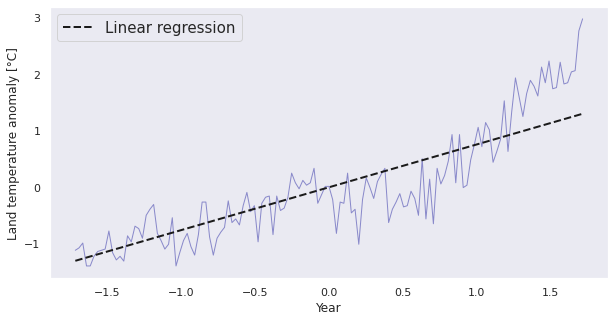

In [152]:
from matplotlib import pyplot
%matplotlib inline

pyplot.figure(figsize=(10, 5))

pyplot.plot(year_scaled, temp_anomaly_scaled, color='#2929a3', linestyle='-', linewidth=1, alpha=0.5) 
pyplot.plot(year_scaled, reg, 'k--', linewidth=2, label='Linear regression')
pyplot.xlabel('Year')
pyplot.ylabel('Land temperature anomaly [°C]')
pyplot.legend(loc='best', fontsize=15)
pyplot.grid();reg = b + w * year_scaled